# HEALTH INSURANCE RECOMMENDER SYSTEM


# 1. Business Understanding

## Introduction

Health Insurance Policies are very important because they affect the health state of individuals. Getting a suitable health insurance cover based on one's preferences and ability is therefore critical and of paramount importance. It can indeed be the difference between life and death, so it should be approached seriously

## Problem Statement

Getting the right insurance policy is often a very difficult task due to the numerous options available. The different services offered  by various policies often compound this problems. Navigating this sphere is therefore often very challenging without informed opinions. Through leveraging AI and data science techniques, a model that can predict the most suitable insurance option for a client, tailor made to their health conditions and preferences, can therefore go a long way in aiding such clients get value for their money and avoid the pitfalls that affect many when applying for insurance policies

## Key Stakeholders

- **`1. Insurance Companies`**- They will be able to advise clients on most worthwhile insurance policies for them,increasing efficiency and approval of their services
- **`2. Working class population`**- Individuals are able to select policies that best suite them, avoiding problems that arise from selecting unsuitable covers
- **`3. Healthcare organizations e.g hospitals, health ministry`**- They are able to improve general health by offering informed opinions to patients/clients 



# 2.Data Understanding 

# 3.Data Preparation

## Data Inspection


In [3]:
# import pandas

import pandas as pd
# Read csv
df= pd.read_csv('../health_insurance_recommender.csv')

In [4]:
df.shape

(52500, 42)

- The dataset is quite large, It has `52500` rows, `42` columns

In [5]:
# info csv
df.isna().sum()

user_id                           0
age                            2641
gender                            0
country                           0
region                            0
employment_status                 0
monthly_income                 2636
pre_existing_conditions           0
number_of_dependents              0
current_health_expenditure        0
hospital_preference               0
previous_insurance_coverage       0
preferred_coverage_type           0
insurance_provider                0
plan_cost                         0
deductible_amount                 0
out_of_pocket_max                 0
medication_coverage               0
maternity_coverage                0
chronic_illness_coverage          0
emergency_coverage                0
dental_coverage                   0
vision_coverage                   0
user_satisfaction_rating       2619
recommended_plan                  0
policy_expiry_date                0
duplicate_plan_cost               0
duplicate_country           

- Some columns , have some missing values.This will be handled in data cleaning phase

## Data Description

Below is the description of the target and featues from the documentation


| #  | Feature                        | Definition  |
|----|--------------------------------|----------------------------------------------------------|
| 1  | user_id                        | Unique identifier for each user  |
| 2  | age                             | Age of the user  |
| 3  | gender                          | Gender of the user (Male, Female, Other)  |
| 4  | country                         | Country of residence  |
| 5  | monthly_income                  | User's monthly income in USD  |
| 6  | health_condition                | Primary health condition of the user (e.g., Diabetes, Hypertension, Asthma)  |
| 7  | plan_cost                       | Monthly cost of the insurance plan in USD  |
| 8  | deductible_amount               | Amount user pays before insurance covers expenses  |
| 9  | out_of_pocket_max               | Maximum amount user pays per year before full coverage  |
| 10 | family_size                     | Number of dependents in the family  |
| 11 | marital_status                  | User's marital status (Single, Married, Divorced, Widowed)  |
| 12 | employment_type                 | User's employment type (Salaried, Self-employed, Unemployed)  |
| 13 | education_level                 | Highest level of education attained by the user  |
| 14 | recent_hospital_visits          | Number of hospital visits in the past year  |
| 15 | smoking_habit                   | Whether the user smokes (Yes, No)  |
| 16 | alcohol_consumption             | Whether the user consumes alcohol (Yes, No)  |
| 17 | existing_medications            | Whether the user is on long-term medication (Yes, No)  |
| 18 | disability_status               | Whether the user has a disability (Yes, No)  |
| 19 | co_payment_preference           | User's preference for co-payment level (Low, Medium, High)  |
| 20 | lifetime_coverage_limit         | Maximum lifetime coverage amount in USD  |
| 21 | claim_reimbursement_speed       | Speed of claim reimbursement (Fast, Medium, Slow)  |
| 22 | insurance_effective_time        | Time taken for the insurance plan to start being effective (in days)  |
| 23 | target_plan                     | Recommended insurance plan based on user profile  |


## Features Missing Descriptions  

The following features are present in the dataset but are not yet described:  

- **`region`**  
- **`employment_status`**  
- **`pre_existing_conditions`**  
- **`number_of_dependents`**  
- **`current_health_expenditure`**  
- **`hospital_preference`**  
- **`previous_insurance_coverage`**  
- **`preferred_coverage_type`**  
- **`insurance_provider`**  
- **`medication_coverage`**  
- **`maternity_coverage`**  
- **`chronic_illness_coverage`**  
- **`emergency_coverage`**  
- **`dental_coverage`**  
- **`vision_coverage`**  
- **`user_satisfaction_rating`**  
- **`recommended_plan`**  
- **`policy_expiry_date`**  
- **`duplicate_plan_cost`**  
- **`duplicate_country`**  
- **`waiting_period_months`**  
- **`preferred_hospital`**  



## Data Cleaning

### Checking for duplicates and missing values

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Display columns with missing values
print("\nNumber of missing values in each column:")
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 1:
        print(f"{column}: {missing_values}")

Number of duplicate rows: 0

Number of missing values in each column:
age: 2641
monthly_income: 2636
user_satisfaction_rating: 2619


- There are no duplicated rows. However, 3 columns have missing data. Before imputing/ deleting missing rows lets plot their distribution


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing numerical columns:


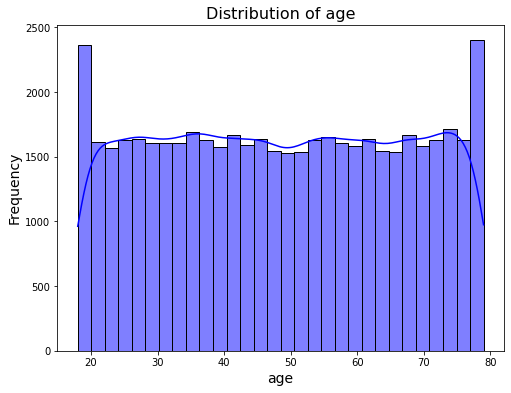

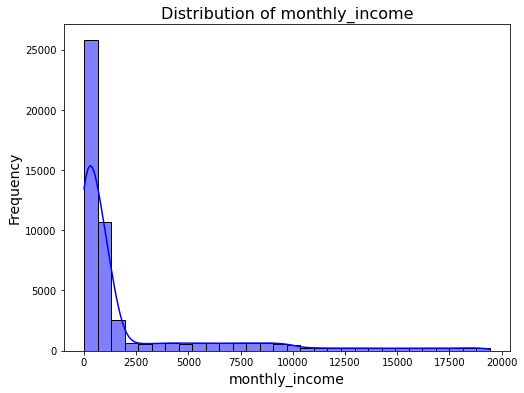

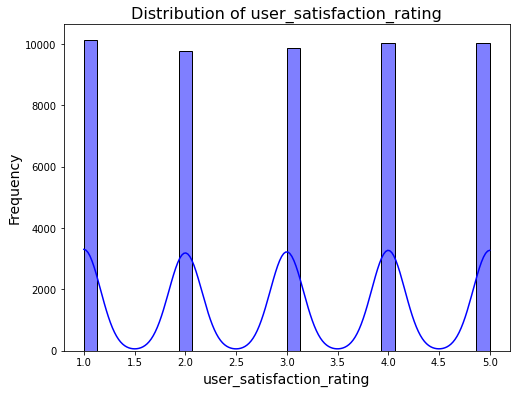

In [8]:
# Plot numerical columns
print("Visualizing numerical columns:")
for column in df[['age','monthly_income','user_satisfaction_rating']].columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

## **Handling Missing Values: Imputation Strategy**
To ensure data integrity and reduce bias, we have chosen appropriate imputation strategies based on the distribution of each variable.

### **1. Age (Median Imputation)**
- The distribution of age appears nearly uniform with slight variations.
- Using the **median** is appropriate because:
  - It is robust to outliers.
  - It represents the central tendency of the data without being influenced by extreme values.
  - It maintains the overall structure of the distribution.

### **2. Monthly Income (Median Imputation)**
- Monthly income is **highly right-skewed**, meaning there are a few extremely high values.
- Using the **median** is preferred because:
  - The mean would be affected by high-income outliers, leading to overestimation.
  - The median provides a more reliable central measure for skewed distributions.
  - It better represents the typical income level without distortion from extreme values.

### **3. User Satisfaction Rating (Mode Imputation)**
- This variable is **ordinal/categorical**, typically on a scale (e.g., 1-5).
- Using the **mode** is ideal because:
  - It preserves the most common response, maintaining data consistency.
  - It avoids artificially shifting the average rating.
  - It ensures that imputed values align with actual user ratings.

By applying these imputation methods, we maintain the dataset's integrity while minimizing distortion.


In [13]:
# Impute missing values
df['age']= df['age'].fillna(df['age'].median())
df['monthly_income']= df['monthly_income'].fillna(df['monthly_income'].median())
df['user_satisfaction_rating']= df['user_satisfaction_rating'].fillna(df['user_satisfaction_rating'].mode()[0])

In [14]:
# confirm imputation
df.isna().sum()

user_id                        0
age                            0
gender                         0
country                        0
region                         0
employment_status              0
monthly_income                 0
pre_existing_conditions        0
number_of_dependents           0
current_health_expenditure     0
hospital_preference            0
previous_insurance_coverage    0
preferred_coverage_type        0
insurance_provider             0
plan_cost                      0
deductible_amount              0
out_of_pocket_max              0
medication_coverage            0
maternity_coverage             0
chronic_illness_coverage       0
emergency_coverage             0
dental_coverage                0
vision_coverage                0
user_satisfaction_rating       0
recommended_plan               0
policy_expiry_date             0
duplicate_plan_cost            0
duplicate_country              0
waiting_period_months          0
family_size                    0
marital_st

- There are no longer missing values